# Notebook inspired by the lecture _Data Analysis with Python_ by Cognitive Class / IBM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline 

In [2]:
path="data/clean/auto.csv"
df = pd.read_csv(path)

## Simple linear regression
For this example, we want to look at how highway-mpg can help us predict car price. Using simple linear regression, we will create a linear function with "highway-L/100km" as the predictor variable and the "price" as the response variable.

In [3]:
lm = LinearRegression()

X = df[['highway-L/100km']]
Y = df['price']

lm.fit(X,Y)

Yhat=lm.predict(X)
Yhat[0:5]

print(f'Yhat = {lm.intercept_} + {lm.coef_} X')

Yhat = -14617.843054664594 + [3458.68511314] X


Let's do the same exercize with the variable 'engine-size'.

In [4]:
lm = LinearRegression()

X = df[['engine-size']]
Y = df['price']

lm.fit(X,Y)

Yhat=lm.predict(X)
Yhat[0:5]

print(f'Yhat = {lm.intercept_} + {lm.coef_} X')

Yhat = -7963.338906281049 + [166.86001569] X


## Multiple Linear Regression
From the previous analysis we know that other good predictors of price could be:
- Horsepower
- Curb-weight
- Engine-size
- Highway-mpg

In [5]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
print('intercept:', lm.intercept_)
print('coefs:', lm.coef_)

intercept: -14385.634549360107
coefs: [ 36.6377371    3.50038215  85.37370862 500.51979785]


As we saw above, we should get a final linear function with the structure:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

**Price** = -15678.742628061467 + 52.65851272 x **horsepower** + 4.69878948 x **curb-weight** + 81.95906216 x **engine-size** + 33.58258185 x **highway-L/100km**

## Model Evaluation using Visualization
A good way to visualize the variance of the data is to use a residual plot.

#### What is a residual?
The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

#### So what is a residual plot?
A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

#### What do we pay attention to when looking at a residual plot?
We look at the spread of the residuals: if the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

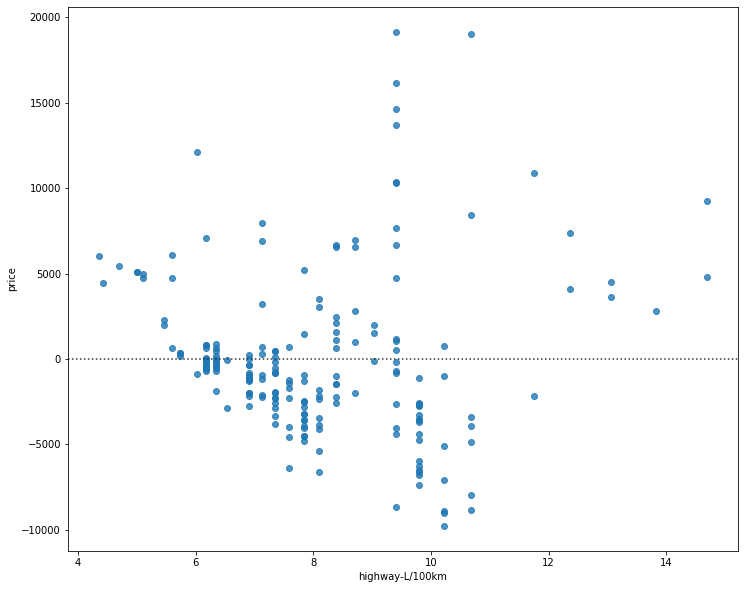

In [7]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-L/100km'], df['price'])
plt.show()

#### What is this plot telling us?
We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

## Multiple Linear Regression
How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot: we can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

First lets make a prediction

In [8]:
Y_hat = lm.predict(Z)

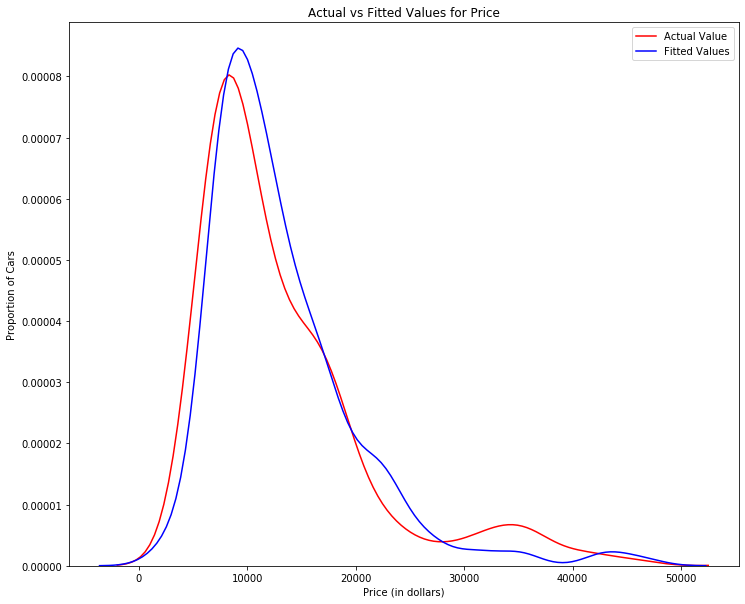

In [9]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

## Polynomial Regression and Pipelines
Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

There are different orders of polynomial regression:
<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 
$$


<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 +b_3 X^3\\
$$


<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....\\
$$

We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

In [34]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(2, 16, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

x = df['highway-L/100km']
y = df['price']

# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

       3         2
-23.4 x + 923.6 x - 7083 x + 2.152e+04


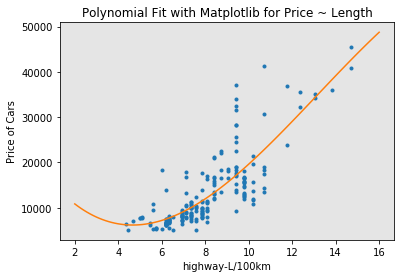

In [35]:
# Plot the function
PlotPolly(p, x, y, 'highway-L/100km')

We can perform a polynomial transform on multiple features. First, we import the module:

In [37]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
Z_pr=pr.fit_transform(Z)

print(Z.shape)
print(Z_pr.shape)

(201, 4)
(201, 15)


The original data is of 201 samples and 4 features, after the transformation, there 201 samples and 15 features.

## Pipeline
Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [40]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

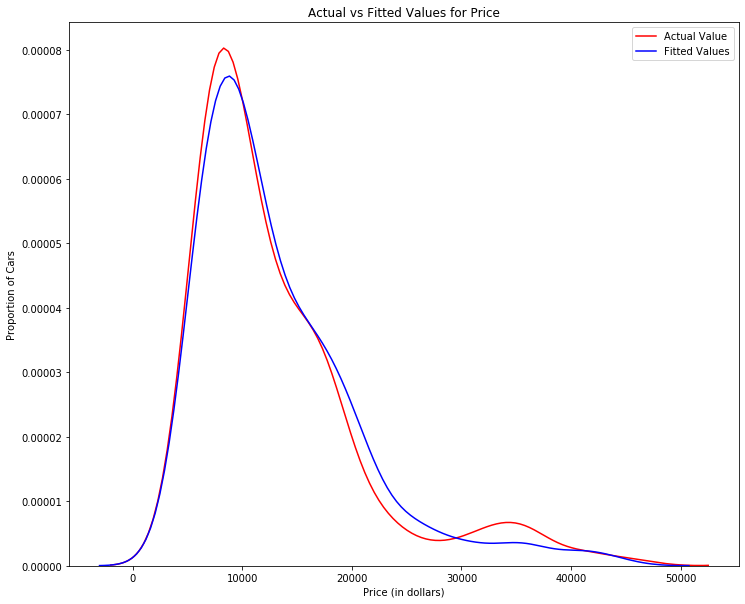

In [43]:
pipe=Pipeline(Input)
pipe.fit(Z,y)
ypipe=pipe.predict(Z)

plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(ypipe, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that we quite improve the result in comparison with the non polynomial model.

## Measures for In-Sample Evaluation

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

- R-squared
- Mean Squared Error (MSE)

#### R-squared
R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

#### Mean Squared Error (MSE)
The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

### Model 1: Simple Linear Regression

In [47]:
from sklearn.metrics import mean_squared_error

In [44]:
#Compute the R^2 score for the simple linear regression using highway_L/100km
lm = LinearRegression()

X = df[['highway-L/100km']]
Y = df['price']

lm.fit(X, Y)
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.6417894513258818


We can say that ~ 64.18% of the variation of the price is explained by this simple linear model "highway_L/100km_fit".

Let's calculate the MSE

In [46]:
Yhat=lm.predict(X)
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  22510543.777085222


### Model 2: Multiple Linear Regression

In [50]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]
lm.fit(Z, Y)
print('The R-square is: ', lm.score(Z, Y))

Yhat=lm.predict(Z)
mse = mean_squared_error(Y, Yhat)
print('The mean square error of price and predicted value is: ', mse)

The R-square is:  0.811811561534475
The mean square error of price and predicted value is:  11826072.956532082


We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

### Model 3: Polynomial Fit

In [56]:
from sklearn.metrics import r2_score

x = df['highway-L/100km']
y = df['price']

# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)

r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)
print('The mean square error of price and predicted value is: ', mean_squared_error(y, p(x)))

The R-square value is:  0.6753581660812171
The mean square error of price and predicted value is:  20401030.180019405


We can say that ~ 67.53 % of the variation of price is explained by this polynomial fit.

### Decision Making: Determining a Good Model Fit
Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

#### What is a good R-squared value?
When comparing models, the model with the higher R-squared value is a better fit for the data.

#### What is a good MSE?
When comparing models, the model with the smallest MSE value is a better fit for the data.

Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
- R-squared: 0.6417894513258818
- MSE: 22510543

Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
- R-squared: 0.811811561534475
- MSE: 11826072

Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

- R-squared: 0.6753581660812171
- MSE: 20401030

#### Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)
Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, you should always check the MSE and R^2.

So to be able to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

- MSE: The MSE of SLR is 22510543 while MLR has an MSE of 11826072. The MSE of MLR is much smaller.
- R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (\~0.642) is very small compared to the R-squared for the MLR (~0.812).
This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.

#### Simple Linear Model (SLR) vs Polynomial Fit
- MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
- R-squared: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.
Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.

#### Multiple Linear Regression (MLR) vs Polynomial Fit
- MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
- R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.

### Conclusion:
Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.

## Note:
This notebook has been adapted from a notebook written by Mahdi Noorian PhD, Joseph Santarcangelo, Bahare Talayian, Eric Xiao, Steven Dong, Parizad, Hima Vsudevan and Fiorella Wenver and Yi Yao.

Joseph Santarcangelo is a Data Scientist at IBM, and holds a PhD in Electrical Engineering. His research focused on using Machine Learning, Signal Processing, and Computer Vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.